In [5]:
pip install matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\janap\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [8]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

#data augmention to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [9]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


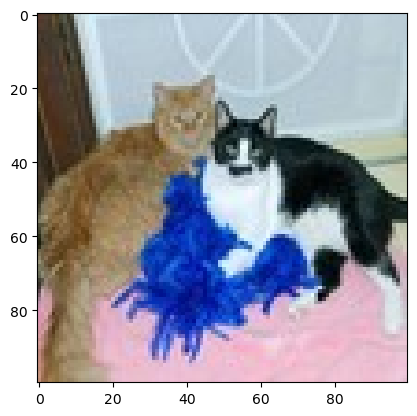

In [18]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [11]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

c:\Users\janap\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model.fit(datagen.flow(x_train, y_train, batch_size = 32),
          epochs = 10,
          validation_data = (x_test, y_test),
          verbose = 1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.5175 - loss: 0.7097 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.5255 - loss: 0.6931 - val_accuracy: 0.6450 - val_loss: 0.6874
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.5665 - loss: 0.6811 - val_accuracy: 0.5850 - val_loss: 0.6580
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.5560 - loss: 0.6803 - val_accuracy: 0.6175 - val_loss: 0.6448
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6005 - loss: 0.6621 - val_accuracy: 0.6250 - val_loss: 0.6234
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.6080 - loss: 0.6613 - val_accuracy: 0.6550 - val_loss: 0.6492
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6285 - loss: 0.6455 - val_accuracy: 0.7050 - val_loss: 0.5892
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6360 - loss: 0.6317 - val_accuracy: 0

In [15]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7100 - loss: 0.5720


[0.5719574093818665, 0.7099999785423279]

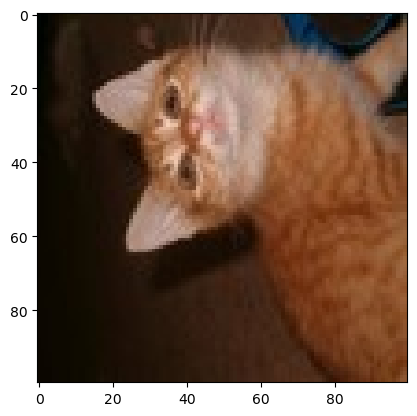

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Our model says it is a:  cat


In [19]:
indx2 = random.randint(0,len(y_test))
plt.imshow(x_test[indx2, :])
plt.show()

y_pred = model.predict(x_test[indx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a: ", pred)

In [17]:
model.save('model.h5')
print("saved model to disk")

saved model to disk
